In [1]:
from IPython.display import display, HTML
display(HTML('<style>.container {width: 100%} </style>'))

## Requirements

In [2]:
!pip install scikeras keras-tuner -q

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%matplotlib notebook

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [5]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

## Sequential model
from tensorflow.keras.models import Sequential

## layers
from tensorflow.keras.layers import Dense, Flatten, Activation, BatchNormalization, Dropout
from tensorflow.keras.initializers import HeNormal, RandomNormal, GlorotNormal

## Hyperparameter
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

tf.get_logger().setLevel('ERROR')

## Load data


**Image Format:** The MNIST dataset consists of grayscale images, where each image is a 28x28 pixel square (784 pixels in total). Each pixel represents the intensity of the grayscale, ranging from 0 (white) to 255 (black).

**Training and Testing Sets:** The dataset is typically divided into two sets: a training set and a testing set. The training set contains 60,000 images, while the testing set contains 10,000 images. This division allows researchers and developers to train machine learning models on the training set and evaluate their performance on the testing set.

**Labels:** Each image in the MNIST dataset is associated with a label indicating the corresponding digit (0-9). These labels serve as the ground truth for training and evaluation purposes.

**Applications:** The MNIST dataset is commonly used as a starting point for beginners in the field of machine learning, as it provides a relatively simple and well-structured task. It has been extensively used to develop and benchmark various image classification algorithms, such as convolutional neural networks (CNNs).

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Explore data

In [8]:
print("Number of training sample:", X_train.shape[0], 'and each image if of shape (%d, %d)'%(X_train.shape[1], X_train.shape[2]))
print("Number of training sample:", X_test.shape[0], 'and each image if of shape (%d, %d)'%(X_test.shape[1], X_test.shape[2]))


Number of training sample: 60000 and each image if of shape (28, 28)
Number of training sample: 10000 and each image if of shape (28, 28)


In [9]:
print("Number of pixels in each image: %d"%(X_train.shape[1]*X_train.shape[2]))


Number of pixels in each image: 784


<IPython.core.display.Javascript object>


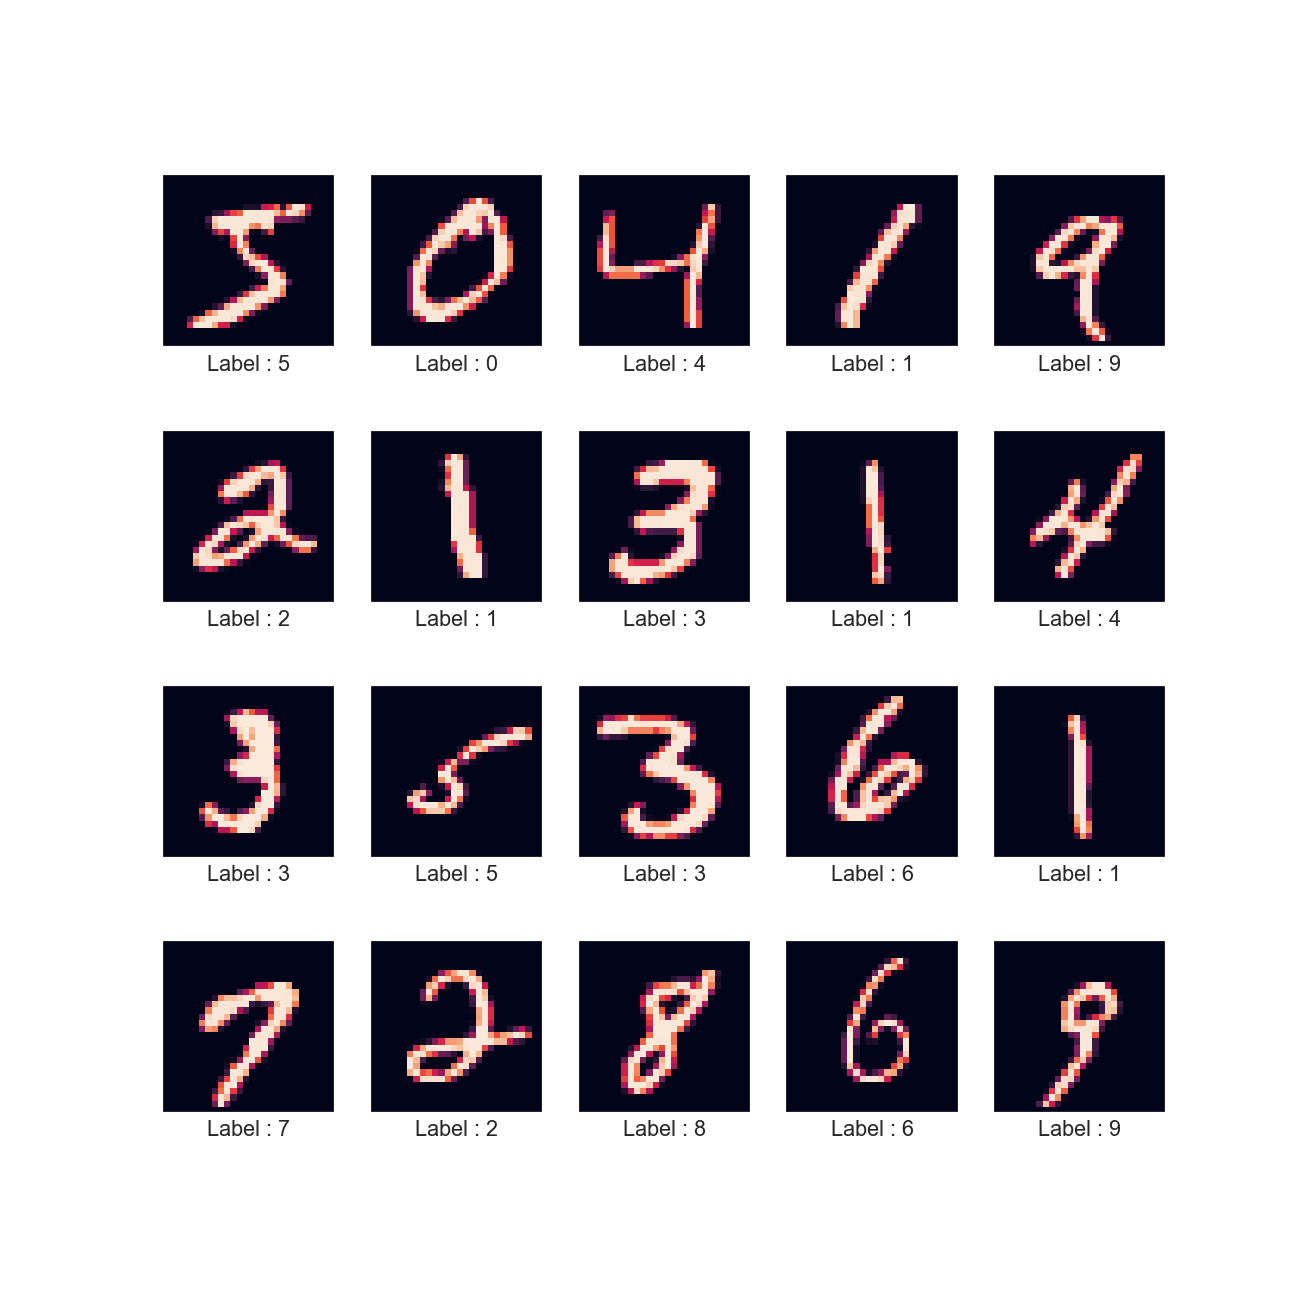

In [10]:
## Visualize
plt.figure(figsize = (10, 10))

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(f'Label : {y_train[i]}')

## Data Preprocessing
- Preprocess images using Min-Max scaling(most popular with image data)
- Rechape features for training
- Encode target to binary vactors

In [11]:
## normalize images
X_train, X_test = X_train/255, X_test/255


Label : 5



<IPython.core.display.Javascript object>


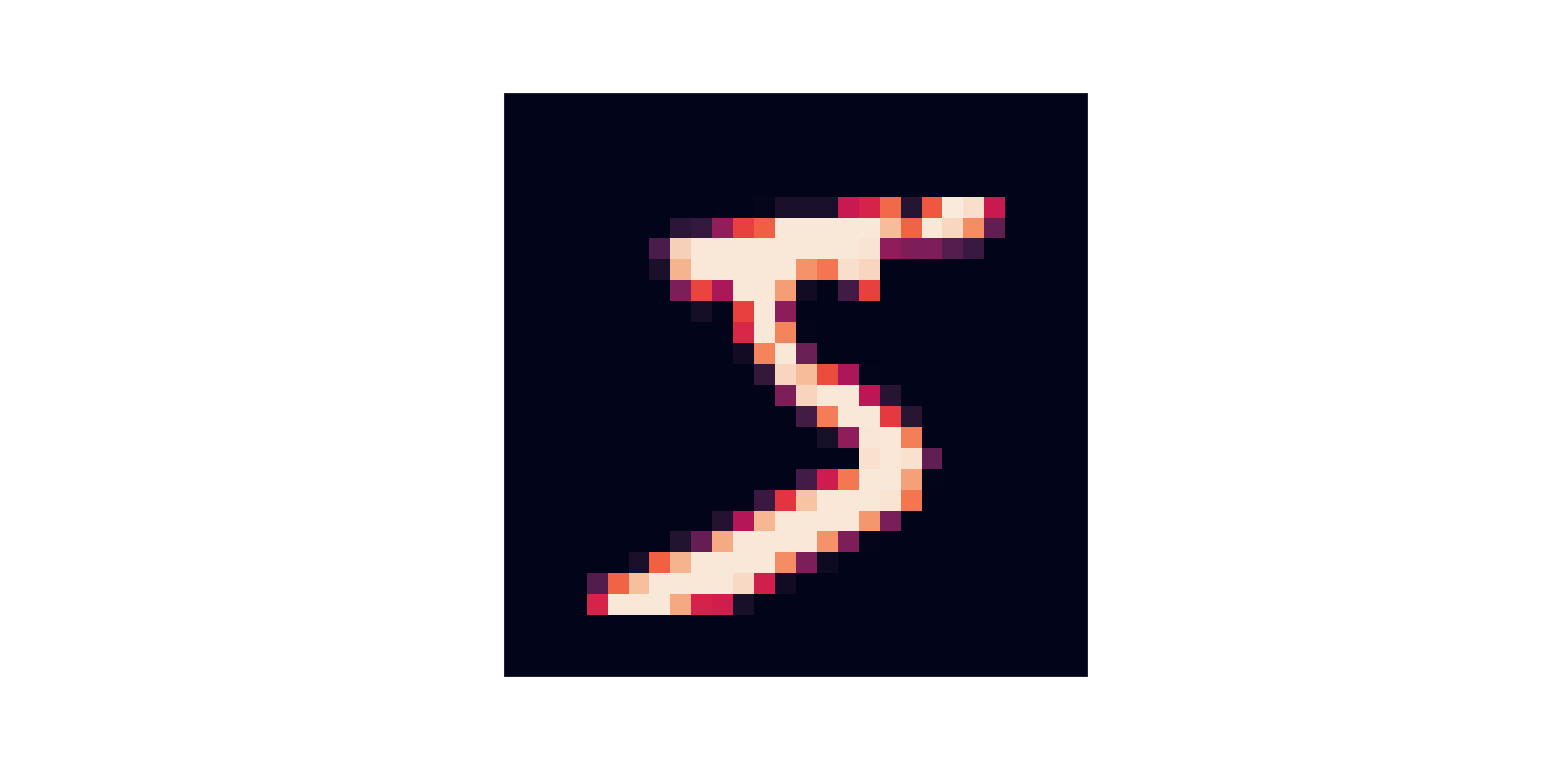

In [12]:
# visualize
print(f'Label : {y_train[0]}\n')
plt.imshow(X_train[0])
plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
## reshape images; flatten each image to get a 1-D array of pixels
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

## number of categories/classes
n_class = 10

## encode target 
y_train = utils.to_categorical(y_train, n_class)
y_test = utils.to_categorical(y_test, n_class)


In [14]:
print('Dimension of training data:\tFeatures-', X_train.shape, '\tTarget-', y_train.shape)
print('\nDimension of testing data:\tFeatures-', X_test.shape, '\tTarget-', y_test.shape)


Dimension of training data:	Features- (60000, 784) 	Target- (60000, 10)

Dimension of testing data:	Features- (10000, 784) 	Target- (10000, 10)


In [15]:
def plt_dynamic(x, y, y_1, ax, ticks,colors=['b'], title = None):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    plt.legend()
    plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

In [16]:
# Hyperparameters
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = y_train.shape[1]
BATCH_SIZE = 128
EPOCHS = 20

## Network parameters
n_hidden_1 = 512
n_hidden_2 = 128

## Building a simple Softmax Classifier

In [54]:
# reset backend
tf.keras.backend.clear_session()

In [55]:
# Build the model

model = Sequential()

## The first layer can receive an `input_shape` or `input_dim` argument, following layers can do automatic shape inference
model.add(Dense(OUTPUT_DIM, input_dim = INPUT_DIM, activation = 'softmax'))

## configure model for training using the compile method
### It receives three arguments:
### An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
### A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
### A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/

## use sparse_categorical_crossentropy loss if y is integer 
model.compile(optimizer= 'sgd', loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [56]:
## fit model to trains for a fixed number of epochs; returns a History object
history = model.fit(x= X_train, 
                    y= y_train, 
                    batch_size= BATCH_SIZE,
                    epochs= EPOCHS, 
                    verbose= 1, 
                    steps_per_epoch = None, # default is None which is equivalent to X_train.shape[0]//BATCH_SIZE
                    validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.2622 - accuracy: 0.7068 - val_loss: 0.8069 - val_accuracy: 0.8365
Epoch 2/20
469/469 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.8408 - val_loss: 0.6052 - val_accuracy: 0.8631
Epoch 3/20
469/469 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.8596 - val_loss: 0.5238 - val_accuracy: 0.8737
Epoch 4/20
469/469 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 0.8701 - val_loss: 0.4781 - val_accuracy: 0.8800
Epoch 5/20
469/469 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.8757 - val_loss: 0.4483 - val_accuracy: 0.8858
Epoch 6/20
469/469 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.8805 - val_loss: 0.4272 - val_accuracy: 0.8911
Epoch 7/20
469/469 [==============================] - 0s 993us/step - loss: 0.4417 - accuracy: 0.8842 - val_loss: 0.4115 - val_accuracy: 0.8933
Epoc

#### Model evaluation

In [57]:
score = model.evaluate(X_test, y_test, verbose = 0)

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.33463725447654724
Test accuracy: 0.9085999727249146


#### Visualize model performance

In [58]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, EPOCHS+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, ticks = np.arange(0, 1.5, step = 0.2))

<IPython.core.display.Javascript object>

## Building a MLP with Sigmoid + Gradient Descent

In [64]:
# reset backend
tf.keras.backend.clear_session()

In [66]:
model_sigmoid = Sequential()

model_sigmoid.add(Dense(n_hidden_1, input_shape = (INPUT_DIM, ), activation = "sigmoid"))
model_sigmoid.add(Dense(n_hidden_2, activation = "sigmoid"))
model_sigmoid.add(Dense(OUTPUT_DIM, activation = "softmax"))

model_sigmoid.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_sigmoid.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model_sigmoid.fit(x = X_train,
                            y = y_train,
                            batch_size = BATCH_SIZE,
                            epochs = EPOCHS,
                            validation_data= (X_test, y_test),
                            steps_per_epoch = 450,
                            verbose = 1)


Epoch 1/20
450/450 [==============================] - 1s 3ms/step - loss: 2.2708 - accuracy: 0.2302 - val_loss: 2.2284 - val_accuracy: 0.2561
Epoch 2/20
450/450 [==============================] - 1s 3ms/step - loss: 2.1871 - accuracy: 0.4381 - val_loss: 2.1371 - val_accuracy: 0.4762
Epoch 3/20
450/450 [==============================] - 1s 3ms/step - loss: 2.0831 - accuracy: 0.5682 - val_loss: 2.0127 - val_accuracy: 0.5802
Epoch 4/20
450/450 [==============================] - 1s 2ms/step - loss: 1.9374 - accuracy: 0.6294 - val_loss: 1.8395 - val_accuracy: 0.6846
Epoch 5/20
450/450 [==============================] - 1s 2ms/step - loss: 1.7425 - accuracy: 0.6847 - val_loss: 1.6207 - val_accuracy: 0.7209
Epoch 6/20
450/450 [==============================] - 1s 2ms/step - loss: 1.5181 - accuracy: 0.7291 - val_loss: 1.3877 - val_accuracy: 0.7575
Epoch 7/20
450/450 [==============================] - 1s 2ms/step - loss: 1.2950 - accuracy: 0.7610 - val_loss: 1.1786 - val_accuracy: 0.7792
Epoch 

In [69]:
scores_sigmoid = model_sigmoid.evaluate(X_test, y_test)

print('Test loss', scores_sigmoid[0], '\nTest accuracy', scores_sigmoid[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.8775
Test loss 0.4630280137062073 
Test accuracy 0.8774999976158142


#### Visualize model performance

In [70]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, EPOCHS+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, ticks = np.arange(0, 1.5, step = 0.2))

<IPython.core.display.Javascript object>

### Inspect weight distribution

<IPython.core.display.Javascript object>


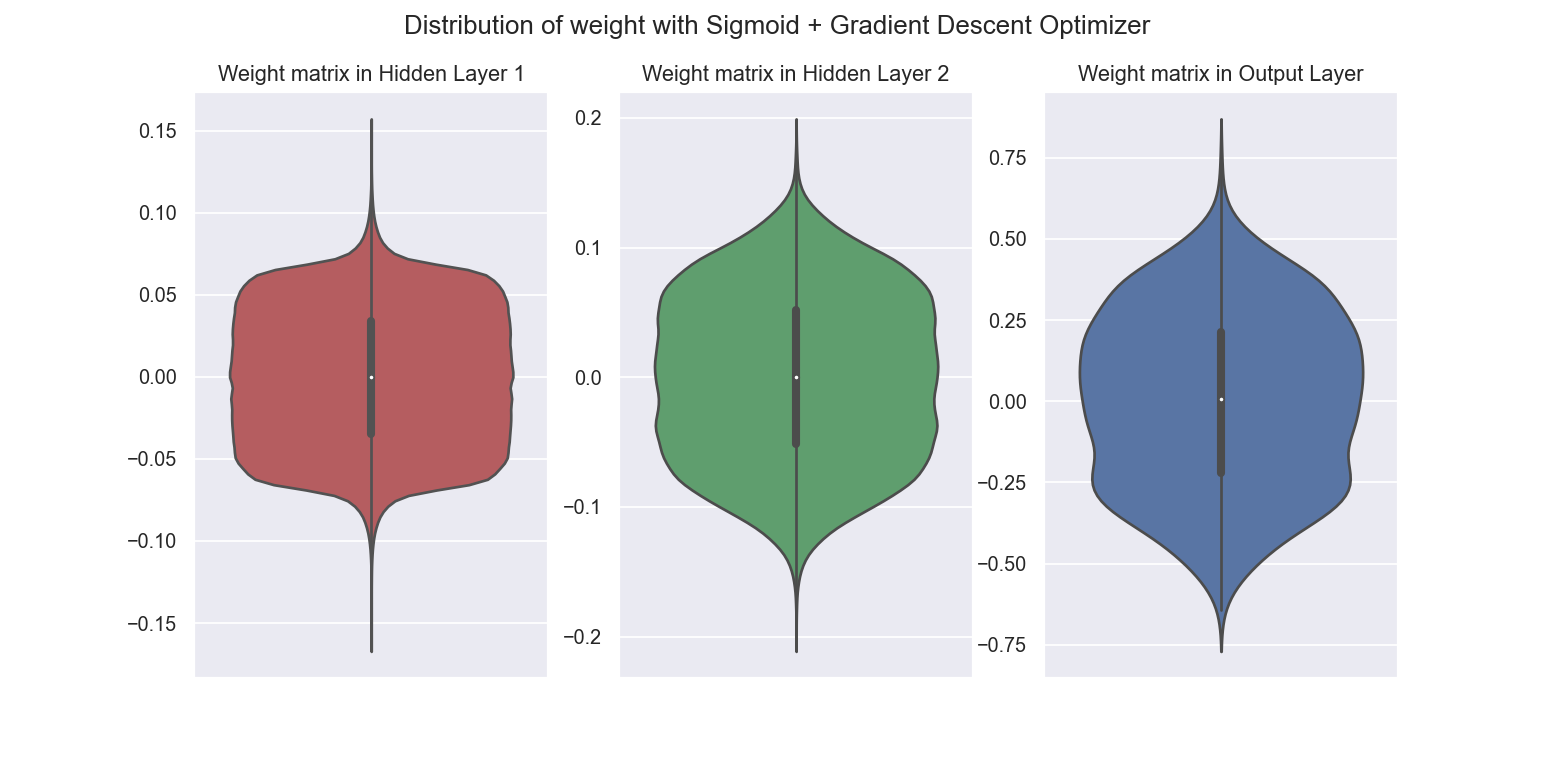

In [71]:
weights = model_sigmoid.get_weights()

h1_weights = weights[0].flatten()
h2_weights = weights[2].flatten()
out_weights = weights[4].flatten()

sns.set(rc={'figure.figsize':(12,6)})
f, (ax1, ax2, ax3) = plt.subplots(1, 3)

sns.violinplot(y = h1_weights, color = 'r', ax = ax1)
ax1.set_title('Weight matrix in Hidden Layer 1')

sns.violinplot(y = h2_weights, color = 'g', ax = ax2)
ax2.set_title('Weight matrix in Hidden Layer 2')

sns.violinplot(y = out_weights, color = 'b', ax = ax3)
ax3.set_title('Weight matrix in Output Layer')

plt.suptitle('Distribution of weight with Sigmoid + Gradient Descent Optimizer')
plt.show()

## Building a MLP with ReLU + Adam optimizer with weight initializers

In [72]:
# reset backend
tf.keras.backend.clear_session()

In [80]:
model_relu_adam = Sequential()

## for relu layers Henormal intialization works well
## we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
## h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
## h2 =>  σ=√(2/(fan_in)  = 0.125  => N(0,σ) = N(0,0.125)
## out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)
## HeNormal() is implemented in Keras
model_relu_adam.add(Dense(n_hidden_1, input_shape = (INPUT_DIM, ), activation = "relu", kernel_initializer = RandomNormal(mean= 0, stddev= 0.062))) 
model_relu_adam.add(Dense(n_hidden_2, activation = "relu", kernel_initializer = RandomNormal(mean=0, stddev= 0.125)))
model_relu_adam.add(Dense(OUTPUT_DIM, activation = "softmax", kernel_initializer = RandomNormal(mean=0, stddev= 0.12)))

model_relu_adam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_relu_adam.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model_relu_adam.fit(x = X_train,
                            y = y_train,
                            batch_size = BATCH_SIZE,
                            epochs = EPOCHS,
                            validation_data= (X_test, y_test),
                            steps_per_epoch = 450,
                            verbose = 1)


Epoch 1/20
450/450 [==============================] - 2s 3ms/step - loss: 0.2386 - accuracy: 0.9311 - val_loss: 0.1158 - val_accuracy: 0.9664
Epoch 2/20
450/450 [==============================] - 1s 3ms/step - loss: 0.0870 - accuracy: 0.9739 - val_loss: 0.0809 - val_accuracy: 0.9743
Epoch 3/20
450/450 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.9822 - val_loss: 0.0699 - val_accuracy: 0.9794
Epoch 4/20
450/450 [==============================] - 1s 2ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0747 - val_accuracy: 0.9779
Epoch 5/20
450/450 [==============================] - 1s 2ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0710 - val_accuracy: 0.9788
Epoch 6/20
450/450 [==============================] - 1s 2ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0612 - val_accuracy: 0.9823
Epoch 7/20
450/450 [==============================] - 1s 3ms/step - loss: 0.0189 - accuracy: 0.9943 - val_loss: 0.0781 - val_accuracy: 0.9792
Epoch 

In [75]:
scores_relu_adam = model_relu_adam.evaluate(X_test, y_test)

print('Test loss', scores_relu_adam[0], '\nTest accuracy', scores_relu_adam[1])

313/313 [==============================] - 0s 991us/step - loss: 0.0869 - accuracy: 0.9835
Test loss 0.08685506880283356 
Test accuracy 0.9835000038146973


#### Visualize model performance

In [77]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, EPOCHS+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, ticks = np.arange(0, 0.5, step = 0.1))

<IPython.core.display.Javascript object>

### Inspect weight distribution

<IPython.core.display.Javascript object>


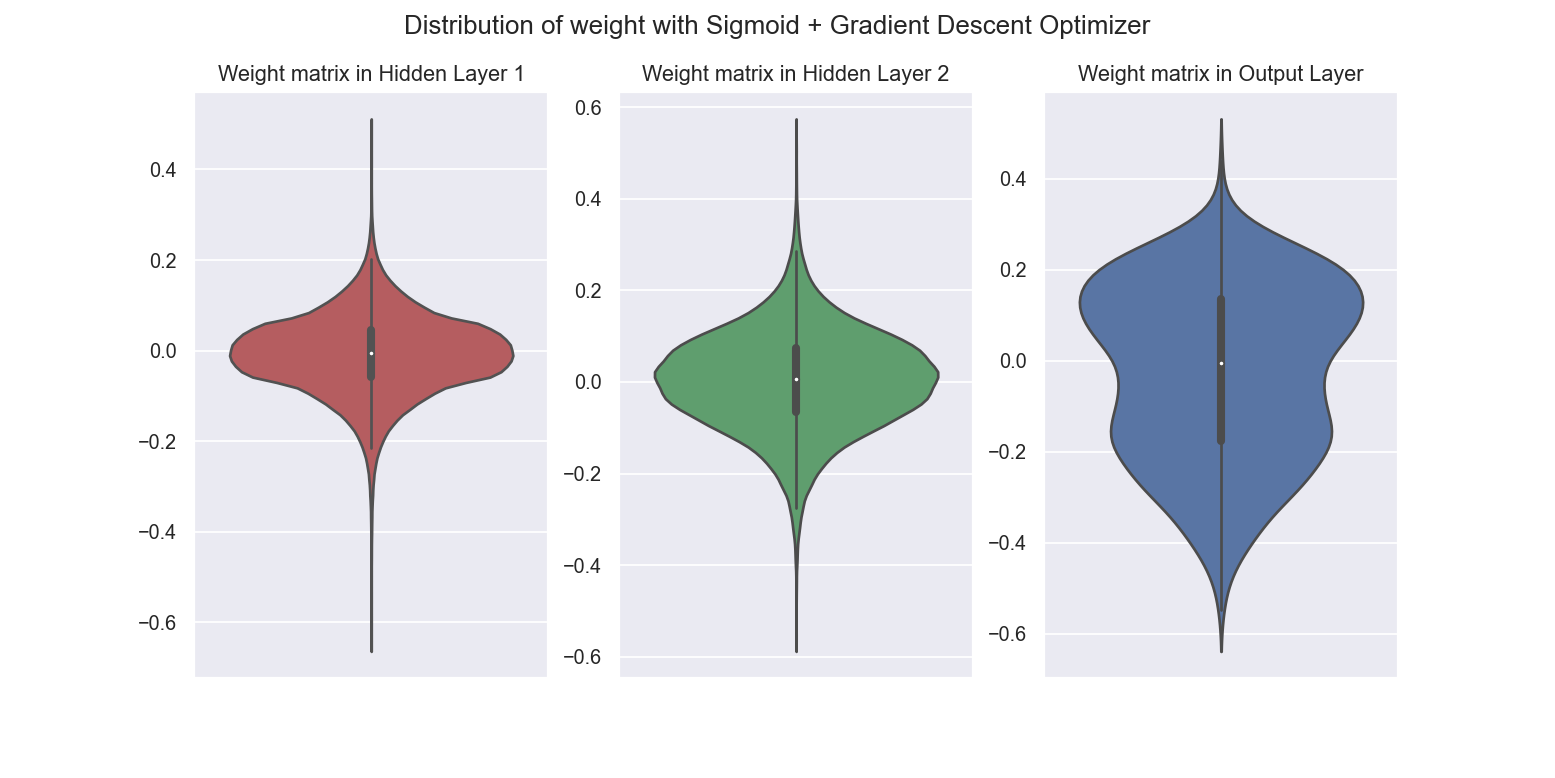

In [78]:
weights = model_relu_adam.get_weights()

h1_weights = weights[0].flatten()
h2_weights = weights[2].flatten()
out_weights = weights[4].flatten()

sns.set(rc={'figure.figsize':(12,6)})
f, (ax1, ax2, ax3) = plt.subplots(1, 3)

sns.violinplot(y = h1_weights, color = 'r', ax = ax1)
ax1.set_title('Weight matrix in Hidden Layer 1')

sns.violinplot(y = h2_weights, color = 'g', ax = ax2)
ax2.set_title('Weight matrix in Hidden Layer 2')

sns.violinplot(y = out_weights, color = 'b', ax = ax3)
ax3.set_title('Weight matrix in Output Layer')

plt.suptitle('Distribution of weight with Sigmoid + Gradient Descent Optimizer')
plt.show()

## Building a MLP with ReLU + Batch Normalization + Dropout + Adam optimizer ans HeNormal weight initializer

In [19]:
# reset backend
tf.keras.backend.clear_session()

In [20]:
model = Sequential()

model.add(Dense(n_hidden_1, input_dim = INPUT_DIM, activation = "relu", kernel_initializer = HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(n_hidden_2, input_dim = INPUT_DIM, activation = "relu", kernel_initializer = HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(OUTPUT_DIM, activation = "softmax"))

model.summary()

## non-trainaible parameters - scale and offset
## layer 1 non-trainable param(scale+ offset) = 512 + 512
## layer 2 non-trainable param(scale+ offset) = 128 + 128

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [21]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x = X_train, y = y_train, batch_size= BATCH_SIZE, epochs= EPOCHS, validation_data= (X_test, y_test), verbose = 1)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3305 - accuracy: 0.9012 - val_loss: 0.1180 - val_accuracy: 0.9614
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1485 - accuracy: 0.9551 - val_loss: 0.0897 - val_accuracy: 0.9721
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1111 - accuracy: 0.9660 - val_loss: 0.0757 - val_accuracy: 0.9776
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0906 - accuracy: 0.9717 - val_loss: 0.0709 - val_accuracy: 0.9787
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0760 - accuracy: 0.9758 - val_loss: 0.0695 - val_accuracy: 0.9796
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0674 - accuracy: 0.9790 - val_loss: 0.0684 - val_accuracy: 0.9786
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0596 - accuracy: 0.9812 - val_loss: 0.0626 - val_accuracy: 0.9813
Epoch 

In [22]:
score = model.evaluate(X_test, y_test)

print('Test loss', score[0], '\nTest accuracy', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0668 - accuracy: 0.9819
Test loss 0.06676411628723145 
Test accuracy 0.9818999767303467


#### Visualize model performance

<IPython.core.display.Javascript object>


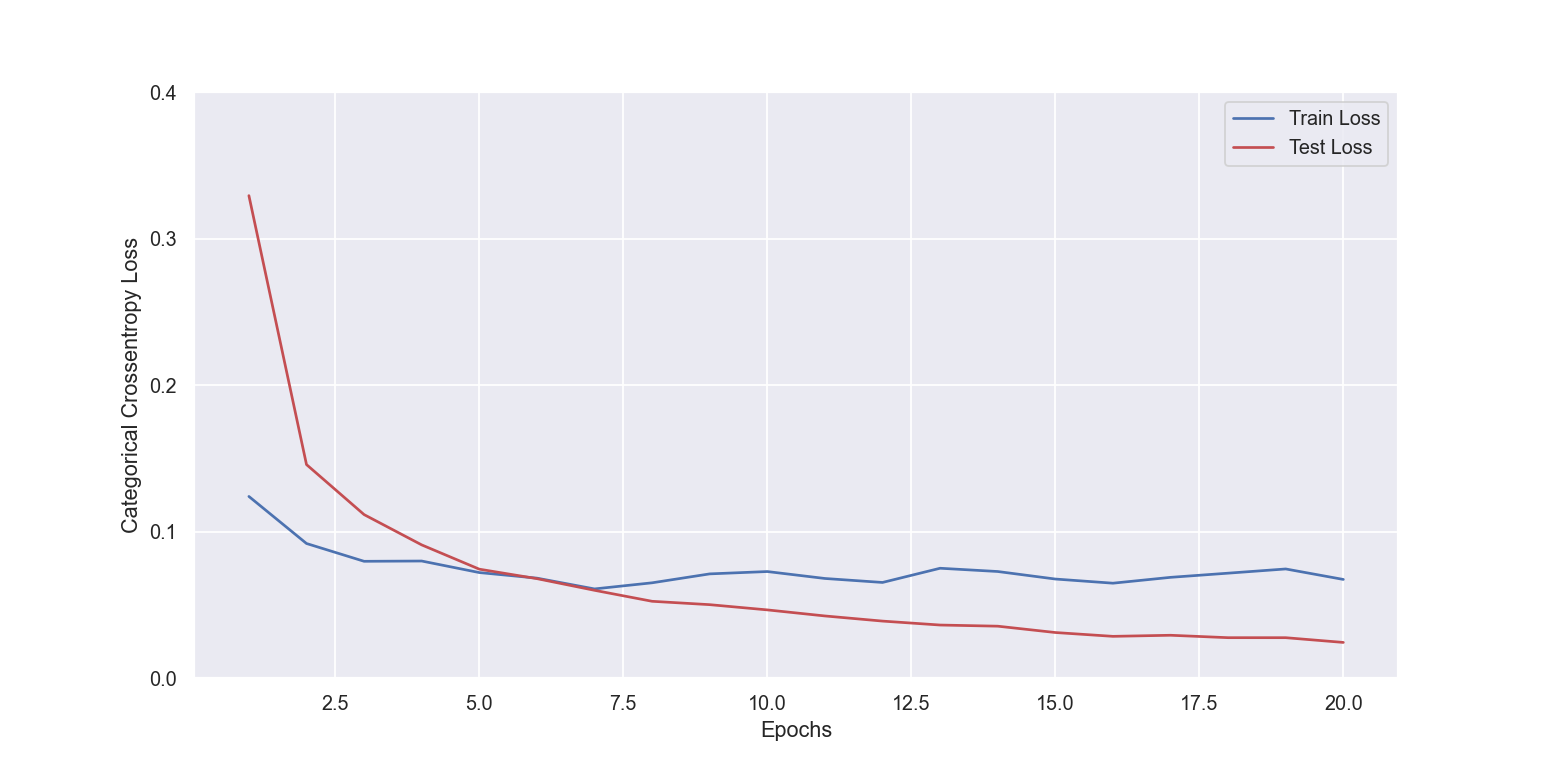

In [87]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, EPOCHS+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, ticks = np.arange(0, 0.5, step = 0.1))

## Hyperparameter tuning with Keras

In [36]:
## reset backend
tf.keras.backend.clear_session()

### Using sklearn wrapper

In [21]:
def model_fn(activation, initializer, optimizer = 'sgd'):
    
    model = Sequential()
    model.add(Dense(n_hidden_1, input_dim = INPUT_DIM, activation = activation, kernel_initializer = initializer))
    model.add(Dense(n_hidden_2, activation = activation, kernel_initializer = initializer))
    model.add(Dense(OUTPUT_DIM, activation = "softmax"))
    
    model.compile(optimizer= optimizer, loss = "categorical_crossentropy", metrics = 'accuracy')
    
    return model


In [22]:
model = KerasClassifier(model = model_fn,
                        batch_size= BATCH_SIZE,
                        epochs= EPOCHS,
                        activation = None,
                        initializer = None)

In [23]:
## define the grid search parameters
activation = ['sigmoid', 'relu']
initializer = [HeNormal(), GlorotNormal()]
optimizer = ['SGD', 'Adam']

param_grid = dict(optimizer=optimizer, activation = activation, initializer = initializer)

## for grid search
grid = GridSearchCV(estimator = model, 
                    param_grid = param_grid, 
                    cv = 3, 
                    scoring= 'accuracy', 
                    n_jobs = -1, 
                    return_train_score=True, 
                    verbose = 1) ## n_jobs = -1 for CPU for parallelization

grid_result = grid.fit(X_train, y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
313/313 [==============================] - 5s 12ms/step - loss: 1.2317 - accuracy: 0.6991
Epoch 2/20
313/313 [==============================] - 5s 13ms/step - loss: 2.2904 - accuracy: 0.1787
Epoch 2/20
313/313 [==============================] - 5s 13ms/step - loss: 2.2720 - accuracy: 0.2081
Epoch 2/20
313/313 [==============================] - 15s 35ms/step - loss: 2.2841 - accuracy: 0.1943
Epoch 2/20
192/313 [=================>............] - ETA: 3s - loss: 2.2089 - accuracy: 0.3752Epoch 3/20


251/313 [=======================>......] - ETA: 1s - loss: 2.1984 - accuracy: 0.4520

313/313 [==============================] - 10s 33ms/step - loss: 2.2304 - accuracy: 0.3216
Epoch 3/20
313/313 [==============================] - 10s 33ms/step - loss: 0.3528 - accuracy: 0.9028 0.8920567 - accuracy: 0.560: 9s - loss: 2.1991 - accuracy: 0.401 - loss: 0.4084 - accuracy: 0.89
Epoch 5/20
313/313 [==============================] - 10s 32ms/step - loss: 2.0822 - accuracy: 0.5454========>..............] - ETA: 4s - loss: 0.4110 - accuracy: 0.89
Epoch 5/20
313/313 [==============================] - 10s 34ms/step - loss: 2.0432 - accuracy: 0.5640.............] - ETA: 6s - loss: 2.1733 - accuracy: 0.47
Epoch 5/20
313/313 [==============================] - 11s 34ms/step - loss: 0.3974 - accuracy: 0.8945loss: 2.1382 - accuracy: 0=>..................] - ETA: 6s - loss: 2.1608 - accuracy: 0.47
Epoch 4/20
313/313 [==============================] - 11s 34ms/step - loss: 2.1657 - accuracy: 0.4670accuracy: ==========>..............] - ETA: 4s - loss: 2.1764 - accuracy: 0.47: 0.3682 - acc

 67/313 [=====>.......

313/313 [==============================] - 12s 39ms/step - loss: 2.0442 - accuracy: 0.5838
Epoch 5/20
313/313 [==============================] - 12s 38ms/step - loss: 1.7375 - accuracy: 0.6591
Epoch 7/20
313/313 [==============================] - 11s 36ms/step - loss: 0.3193 - accuracy: 0.9107==================>..........] - ETA: 3s - loss: 0.2791 - accuracy: 0.92s - loss: 1.9970 - accuracy: 0.61=======================>.....] - ETA: 1s - loss: 1.8685 - accuracy: 0.672
Epoch 6/20
313/313 [==============================] - 12s 38ms/step - loss: 1.8557 - accuracy: 0.6715
Epoch 6/20
313/313 [==============================] - 11s 36ms/step - loss: 1.9807 - accuracy: 0.6199curacy: 0.60=========>.............] - ETA: 4s - loss: 0.2950 - accuracy: 0.91
Epoch 6/20
313/313 [=========================.....] - ETA: 7s - loss: 1.5414 - accuracy: 0.688[============================>.] - ETA: 0s - loss: 1.8788 - accuracy: 0.60=====] - 12s 37ms/step - loss: 1.8769 - accuracy: 0.6100
Epoch 7/20
313/313 [

295/313 [===========================>..] - ETA: 0s - loss: 1.5581 - accuracy: 0.6997

148/313 [========

259/313 [======================

195/313 [=================>............] - ETA: 4s - loss: 1.

313/313 [==============================] - 14s 43ms/step - loss: 1.5576 - accuracy: 0.7095=======>...............] - ETA: 6s - loss: 1.2756 - accuracy: 0.73
Epoch 9/20
118/313 [==========>...................] - ETA: 8s - loss: 1.3582 - accuracy: 0.7382Epoch 10/20
Epoch 10/20
 34/313 [==>...........................] - ETA: 11s - loss: 0.2563 - accuracy: 0.9308Epoch 10/20


313/313 [==============================] - 13s 41ms/step - loss: 0.2413 - accuracy: 0.9320oss: 1.1395 - accuracy: 0.76racy: 0============>..............] - ETA: 5s - loss: 1.1313 - accuracy: 0.76: 1.1250 - accuracy: 0.76
Epoch 11/20
313/313 [==============================] - 13s 41ms/step - loss: 1.2633 - accuracy: 0.7531
Epoch 11/20
313/313 [==============================] - 14s 43ms/step - loss: 1.1802 - accuracy: 0.7651- ETA: 7s - loss: 1.2050 - accuracy: 0.740866 - accuracy: 0.76
Epoch 11/20
313/313 [==============================] - 13s 42ms/step - loss: 1.0733 - accuracy: 0.7578
Epoch 13/20
 42/313 [===>..........................] - ETA: 12s - loss: 1.1164 - accuracy: 0.7558Epoch 12/20


313/313 [==============================] - 14s 44ms/step - loss: 0.9367 - accuracy: 0.7919.0796 - accuracy: 0.73 [================>.............] - ETA: 5s - loss: 0.9389 - accuracy: 0.79================>............] - ETA: 5s - loss: 0.9385 - accuracy: 0.79..] - ETA: 8s - loss: 1.0072 - accuracy: 0.789s: 1.0396 - accuracy: 0.7880 - accuracy: 0.
Epoch 13/20
313/313 [==============================] - 13s 43ms/step - loss: 0.8539 - accuracy: 0.8097[=================>............] - ETA: 5s - loss: 1.0024 - accuracy: 0.779/313 [=====>........................] - ETA: 11s - loss: 0.9126 - accuracy: 0.800==>...................] - ETA: 8s - loss: 0.1962 - accuracy: 0.942============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.940
Epoch 15/20
200/313 [==================>...........] - ETA: 4s - loss: 0.7820 - accuracy: 0.8221Epoch 14/20


239/313 [====

313/313 [==============================] - 13s 43ms/step - loss: 0.8124 - accuracy: 0.8099======================>.....] - ETA: 1s - loss: 0.9202 - accuracy: 0.79- loss: 0.8145 - accuracy: 
Epoch 15/20
313/313 [==============================] - 13s 42ms/step - loss: 0.8836 - accuracy: 0.8059[==================>...........] - ETA: 4s - loss: 0.1962 - accuracy: 0.94 5s - loss: 0.1987 - accuracy: 0.945
Epoch 15/20
289/313 [==========================>...] - ETA: 0s - loss: 0.7610 - accuracy: 0.8164Epoch 16/20


313/313 [==============================] - 14s 45ms/step - loss: 0.7093 - accuracy: 0.8347
Epoch 18/20
313/313 [==============================] - 12s 39ms/step - loss: 0.7382 - accuracy: 0.82994 - accuracy: 0.84
Epoch 17/20
313/313 [==============================] - 13s 41ms/step - loss: 0.6736 - accuracy: 0.8414
Epoch 19/20
313/313 [==============================] - 14s 43ms/step - loss: 0.6970 - accuracy: 0.8349..........] - ETA: 8s - loss: 0.1833 - accuracy: 0.94 - loss: 0.6666 - accuracy: 0.835
Epoch 18/20
313/313 [==============================] - 13s 41ms/step - loss: 0.1807 - accuracy: 0.9497 - accuracy: 0.
Epoch 19/20


313/313 [==============================] - 14s 44ms/step - loss: 0.1825 - accuracy: 0.9491
Epoch 19/20
313/313 [==============================] - 12s 40ms/step - loss: 0.1768 - accuracy: 0.9507
Epoch 20/20
183/313 [================>.............] - ETA: 5s - loss: 0.6081 - accuracy: 0.8449Epoch 20/20
Epoch 20/20
157/157 [==============================] - 3s 10ms/step


157/157 [==============================] - 3s 9ms/step
Epoch 1/20
Epoch 1/20
272/313 [=========================>....] - ETA: 0s - loss: 1.2907 - accuracy: 0.6823Epoch 1/20
Epoch 1/20
313/313 [==============================] - 9s 24ms/step - loss: 1.2120 - accuracy: 0.7037
Epoch 2/20
313/313 [==============================] - 9s 22ms/step - loss: 1.2333 - accuracy: 0.7011
Epoch 2/20
313/313 [==============================] - 4s 14ms/step - loss: 0.5237 - accuracy: 0.8709y: 0.86ETA: 1s - loss: 0.5460 - accuracy: 0.8623/313 [====================>.........] - ETA: 1s - loss: 0.5503 - accuracy: 
Epoch 3/20
313/313 [==============================] - 7s 15ms/step - loss: 1.3244 - accuracy: 0.6868
Epoch 2/20
313/313 [==============================] - 7s 15ms/step - loss: 1.3048 - accuracy: 0.6988
Epoch 2/20
313/313 [==============================] - 7s 15ms/step - loss: 1.3414 - accuracy: 0.6756
Epoch 2/20
313/313 [==============================] - 5s 15ms/step - loss: 0.5682 - accuracy: 0.863

313/313 [==============================] - 7s 23ms/step - loss: 0.2523 - accuracy: 0.9281==>............] - ETA: 2s - loss: 0.2330 - accuracy: 0.============>......] - ETA: 1s - loss: 0.2483 - accuracy: 0.9============>.....] - ETA: 1s - loss: 0.2481 - accuracy: 0. - loss: 0.2274 - accuracy: 0.9
Epoch 11/20
313/313 [==============================] - 7s 23ms/step - loss: 0.2458 - accuracy: 0.9311
Epoch 11/20
313/313 [==============================] - 8s 24ms/step - loss: 0.2060 - accuracy: 0.9414racy: 0.ccuracy: 0. ETA: 6s - loss: 0.2230 - accuracy: 0.949/313 [======================>.......] - ETA: 1s - loss: 0.2095 - accuracy: 0.947/313 [================>.............] - ETA: 2s - loss: 0.2447 - accuracy: 0.920.2413 - accuracy: 0.93==================>...] - ETA: 0s - loss: 0.2070 - accuracy: 0.94cy: 0.94
Epoch 15/20
313/313 [==============================] - 7s 24ms/step - loss: 0.2397 - accuracy: 0.9326
Epoch 12/20
313/313 [==============================] - 7s 23ms/step - loss: 0.2245

313/313 [==============================] - 8s 24ms/step - loss: 0.2078 - accuracy: 0.9411TA: 0s - loss: 0.2078 - accuracy: 0.94
Epoch 16/20
313/313 [==============================] - 8s 25ms/step - loss: 0.1939 - accuracy: 0.9462y: 0.94
Epoch 18/20
313/313 [==============================] - 8s 26ms/step - loss: 0.2038 - accuracy: 0.9429======>...........] - ETA: 2s - loss: 0.1905 - accuracy: 0..........] - ETA: 6s - loss: 0.1775 - accuracy: 0.9acy:
Epoch 17/20
313/313 [==============================] - 8s 26ms/step - loss: 0.1928 - accuracy: 0.9456 ETA: 4s - loss: 0.1789 - accuracy: 0.95
Epoch 19/20
313/313 [==============================] - 7s 24ms/step - loss: 0.1977 - accuracy: 0.9442=============>.......] - ETA: 1s - loss: 0.1839 - accuracy: 0.
Epoch 18/20
313/313 [==============================] - 7s 23ms/step - loss: 0.1937 - accuracy: 0.9448
Epoch 18/20
313/313 [==============================] - 7s 23ms/step - loss: 0.1827 - accuracy: 0.9491
Epoch 20/20
313/313 [================

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 1.0018 - accuracy: 0.7585
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4285 - accuracy: 0.8862
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3472 - accuracy: 0.9041
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3087 - accuracy: 0.9135
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2830 - accuracy: 0.9202
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2638 - accuracy: 0.9262
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2479 - accuracy: 0.9305
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2346 - accuracy: 0.9336
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2228 - accuracy: 0.9373
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2122 - accuracy: 0.9402

### Using KerasTuner

In [17]:
## reset backend
tf.keras.backend.clear_session()

In [21]:
## https://keras.io/api/keras_tuner/
## https://keras.io/guides/keras_tuner/getting_started/

from keras_tuner import HyperParameters, RandomSearch

In [38]:
## We define a Keras model with two Dense layers. We want to tune the number of units in the first Dense layer and the learning rate. 
## We just define an integer hyperparameter with hp.Int('units', min_value=32, max_value=512, step=32), whose range is from 32 to 512 inclusive. 
## When sampling from it, the minimum step for walking through the interval is 32.

## Model build function takes an argument hp for defining the hyperparameters while building the model. 
## https://keras.io/api/keras_tuner/hyperparameters/

def build_fn(hp):
    model = Sequential()
    model.add(Flatten())
    # Define the hyperparameter
    model.add(Dense(units = hp.Int("units", min_value = 128, max_value = 512, step = 128),
                    activation = "relu"))
    model.add(Dense(OUTPUT_DIM, activation = "softmax"))
    model.compile(optimizer = Adam(hp.Choice('learning_rate', values = [1e-3, 1e-4])), 
                  loss = "categorical_crossentropy", metrics = ['accuracy'])
    
    return model
    

In [39]:
## Here we use RandomSearch as an example. Other optimization algorithms available are BayesianOptimization & Hyperband
### To initialize the tuner, we need to specify several arguments in the initializer.

### hypermodel - The model-building function, which is build_model in our case
### objective - The name of the objective to optimize 
### max_trials - The total number of trials to run during the search.
### executions_per_trial - The number of models that should be built and fit for each trial
### overwrite - Control whether to overwrite the previous results in the same directory. Here we set overwrite=True to start a new search and ignore any previous results.
### directory. A path to a directory for storing the search results.
### project_name - The name of the sub-directory in the directory.

tuner = RandomSearch(
    hypermodel=build_fn,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="classification",
    project_name="mnist"
)

In [40]:
## summary of the search space
tuner.search_space_summary()


Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


In [41]:
## search for the best hyperparameter configuration. 
## All the arguments passed to search is passed to model.fit() in each execution. 
## Remember to pass validation_data to evaluate the model.
tuner.search(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 13s]
val_accuracy: 0.9494999945163727

Best val_accuracy So Far: 0.9730999767780304
Total elapsed time: 00h 00m 35s
INFO:tensorflow:Oracle triggered exit


In [42]:
## summary of runs
tuner.results_summary()

Results summary
Results in classification/mnist
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
units: 512
learning_rate: 0.001
Score: 0.9730999767780304

Trial 2 summary
Hyperparameters:
units: 512
learning_rate: 0.0001
Score: 0.9494999945163727

Trial 0 summary
Hyperparameters:
units: 128
learning_rate: 0.0001
Score: 0.9299499988555908


In [50]:
## The model is saved at its best performing epoch evaluated on the validation_data.
## Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]

## Build the model.
## Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 28, 28))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [54]:
## To train the model with a different subset of the data, you may retrieve the best hyperparameters and retrain the model

##  Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)

## Build the model with the best hp.
model = build_fn(best_hps[0])

## Fit with the entire dataset.
x_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((y_train, y_test))
model.fit(x=x_all, y=y_all, epochs=1)

scores = model.evaluate(X_test, y_test)
print("Test loss", scores[0])
print("Test accuracy", scores[1])

313/313 [==============================] - 0s 956us/step - loss: 0.0691 - accuracy: 0.9793
Test loss 0.069109246134758
Test accuracy 0.9793000221252441


#### Tune entire model architecture with KerasTuner 

In [27]:
tf.keras.backend.clear_session()

In [28]:
## Includes tuning no. of layers, no. of units in each layer, optimizer , dropout and Batchnormalization
def build_model(hp):
    
    model = Sequential()
    model.add(Flatten())
    
    for i in range(hp.Int(name = "n_layers", min_value = 1, max_value = 4, step = 1)):
        # To tune the number of units in different Dense layers separately as different hyperparameters
        model.add(Dense(hp.Int(name = f"units_{i}", min_value = 64, max_value = 512, step = 32),
                        activation = hp.Choice(name = "activation", values = ["tanh", "relu"]))) 
        
        if hp.Boolean("dropout"):
            model.add(Dropout(hp.Choice(name = "dropout_rate", values = [0.2, 0.5, 0.8])))
            
        if hp.Boolean("batch_normalization"):
            model.add(BatchNormalization())
            
    model.add(Dense(OUTPUT_DIM, activation = "softmax"))
    
#     lr = hp.Float(name = "learning_rate", min_value = 1e-4, max_value = 1e-2, sampling = "log")
    model.compile(optimizer= hp.Choice(name = "optimizer", values = ["adam", "sgd"]),
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])
    
    return model

In [29]:
build_model(HyperParameters())

In [30]:
tuner = RandomSearch(hypermodel= build_model,
                     objective= "val_accuracy",
                     max_trials= 10,
                     executions_per_trial = 3,
                     overwrite=True,
                     directory="classification",
                     project_name="mnist"
                     )

In [31]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'tanh', 'conditions': [], 'values': ['tanh', 'relu'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
batch_normalization (Boolean)
{'default': False, 'conditions': []}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}


In [32]:
tuner.search(X_train, y_train, epochs = 5, validation_data = (X_test, y_test))

Trial 10 Complete [00h 02m 56s]
val_accuracy: 0.9193666577339172

Best val_accuracy So Far: 0.97953333457311
Total elapsed time: 00h 15m 56s


In [33]:
tuner.results_summary()

Results summary
Results in classification/mnist
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 03 summary
Hyperparameters:
n_layers: 1
units_0: 480
activation: tanh
dropout: False
batch_normalization: True
optimizer: adam
dropout_rate: 0.8
units_1: 384
units_2: 224
Score: 0.97953333457311

Trial 06 summary
Hyperparameters:
n_layers: 1
units_0: 320
activation: tanh
dropout: False
batch_normalization: True
optimizer: adam
dropout_rate: 0.2
units_1: 96
units_2: 352
units_3: 160
Score: 0.9790333310763041

Trial 00 summary
Hyperparameters:
n_layers: 1
units_0: 448
activation: tanh
dropout: True
batch_normalization: False
optimizer: adam
dropout_rate: 0.2
Score: 0.9759333332379659

Trial 01 summary
Hyperparameters:
n_layers: 3
units_0: 96
activation: tanh
dropout: True
batch_normalization: False
optimizer: adam
dropout_rate: 0.2
units_1: 64
units_2: 64
Score: 0.9666666587193807

Trial 08 summary
Hyperparameters:
n_layers: 3
units_0: 192
activation: relu
dropout

In [34]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]

best_model.build(input_shape=(None, 28, 28))
best_model.summary()

scores = best_model.evaluate(X_test, y_test)
print("Test loss", scores[0])
print("Test accuracy", scores[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 480)               376800    
                                                                 
 batch_normalization (BatchN  (None, 480)              1920      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                4810      
                                                                 
Total params: 383,530
Trainable params: 382,570
Non-trainable params: 960
_________________________________________________________________
313/313 [==============================] - 0s 995us/step - loss: 0.0725 - accuracy: 0.9812
Test loss 0.07248089462